In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = "{:.3f}".format

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internalgelsd")

import math
from IPython.display import display
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set_style("white")


In [38]:
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')


In [39]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [ ]:
regr = linear_model.LinearRegression()
Y = data["Sales"].values.reshape(-1,1)
X = data[["TV", "Radio", "Newspaper"]]

regr.fit(X, Y)

print("Coefficients: \n", regr.coef_)
print("\nIntercept: \n", regr.intercept_)
print("\nRsquared: \n", regr.score(X,Y))

In [ ]:
predicted = regr.predict(X).ravel()
actual = data["Sales"]

residual = actual - predicted

plt.hist(residual)
plt.title("residual counts")
plt.xlabel("residual")
plt.ylabel("counts")
plt.show()

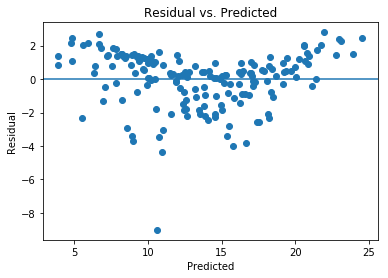

In [40]:
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs. Predicted")
plt.show()

In [41]:
X.corr()

,TV,Radio,Newspaper
TV,1.000,0.066,-0.008
Radio,0.066,1.000,0.221
Newspaper,-0.008,0.221,1.000


In [42]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.023
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


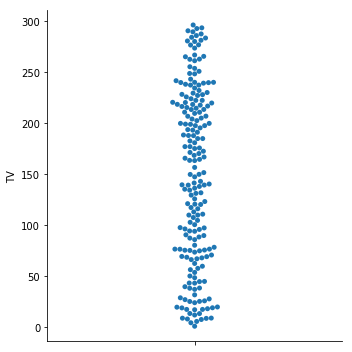

In [43]:
sns.factorplot(y="TV", data=data, kind="swarm")

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


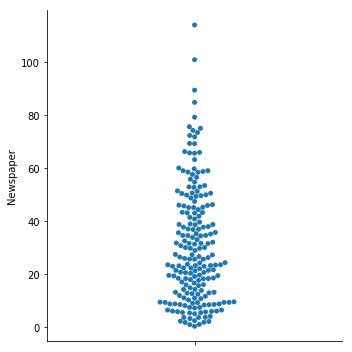

In [44]:
sns.factorplot(y="Newspaper", data=data, kind="swarm")

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


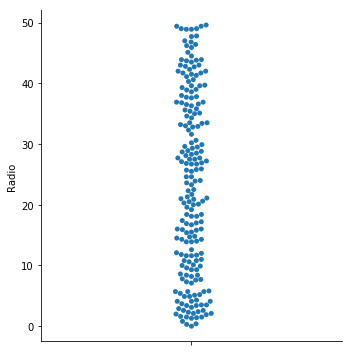

In [45]:
sns.factorplot(y="Radio", data=data, kind="swarm")

In [46]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.023
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


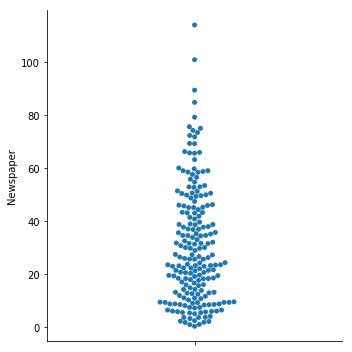

In [47]:
sns.factorplot(y="Newspaper", data=data, kind="swarm")

In [48]:
regr = linear_model.LinearRegression()
Y = data["Sales"].values.reshape(-1,1)
X = data[["TV", "Radio", "Newspaper"]]

regr.fit(X, Y)

print("Coefficients: \n", regr.coef_)
print("\nIntercept: \n", regr.intercept_)
print("\nRsquared: \n", regr.score(X,Y))

Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

Rsquared: 
 0.8972106381789521


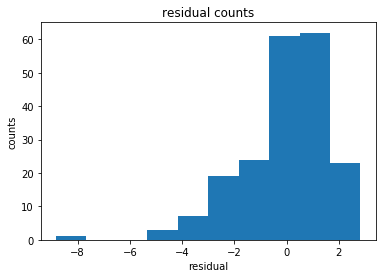

In [49]:
predicted = regr.predict(X).ravel()
actual = data["Sales"]

residual = actual - predicted

plt.hist(residual)
plt.title("residual counts")
plt.xlabel("residual")
plt.ylabel("counts")
plt.show()

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


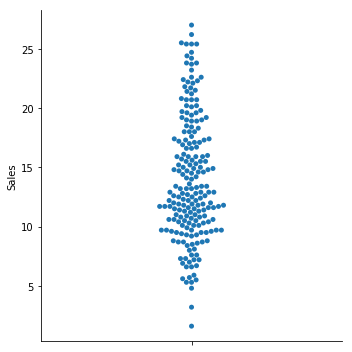

In [50]:
sns.factorplot(y="Sales", data=data, kind="swarm")

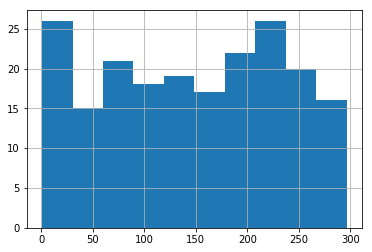

In [51]:
data["TV"].hist()


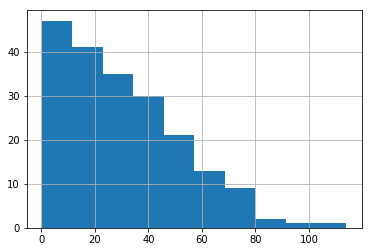

In [52]:
data["Newspaper"].hist()

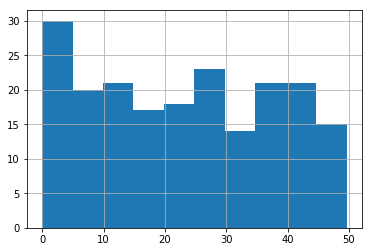

In [53]:
data["Radio"].hist()

In [54]:
#I removed the datapoints where newspaper was greater than 55 in order to make sure there is multivariate normality

df = data[data["Newspaper"] < 55]

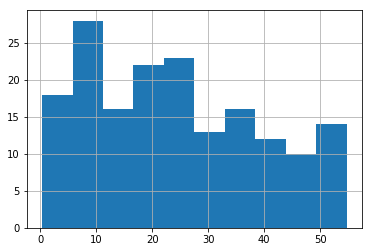

In [55]:
df["Newspaper"].hist()

In [56]:
regr = linear_model.LinearRegression()
Y = df["Sales"].values.reshape(-1,1)
X = df[["TV", "Radio", "Newspaper"]]

regr.fit(X, Y)

print("Coefficients: \n", regr.coef_)
print("\nIntercept: \n", regr.intercept_)
print("\nRsquared: \n", regr.score(X,Y))

Coefficients: 
 [[0.04362717 0.18621173 0.00478986]]

Intercept: 
 [3.16088425]

Rsquared: 
 0.8905278145280757


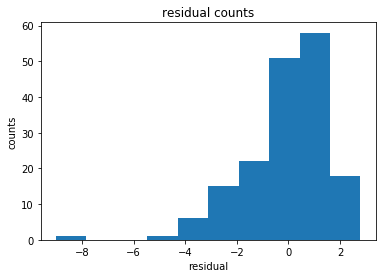

In [57]:
#when i plotted the residual counts with the revised data frame, it is still skewed.

predicted = regr.predict(X).ravel()
actual = df["Sales"]

residual = actual - predicted

plt.hist(residual)
plt.title("residual counts")
plt.xlabel("residual")
plt.ylabel("counts")
plt.show()

In [59]:
len(df["Sales"])

172

In [60]:
len(predicted)

172

In [62]:
df["Predicted"] = predicted


C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
df["Residual"] = residual

C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted,Residual
1,2,44.500,39.300,45.100,10.400,12.636,-2.236
6,7,57.500,32.800,23.500,11.800,11.890,-0.090
7,8,120.200,19.600,11.600,13.200,12.110,1.090
8,9,8.600,2.100,1.000,4.800,3.932,0.868
9,10,199.800,2.600,21.200,10.600,12.463,-1.863


In [72]:
skewed = df[(df["Predicted"] > 12) & (df["Predicted"] < 18)]

skewed.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted,Residual
1,2,44.500,39.300,45.100,10.400,12.636,-2.236
7,8,120.200,19.600,11.600,13.200,12.110,1.090
9,10,199.800,2.600,21.200,10.600,12.463,-1.863
11,12,214.700,24.000,4.000,17.400,17.016,0.384
19,20,147.300,23.900,19.100,14.600,14.129,0.471
21,22,237.400,5.100,23.500,12.500,14.580,-2.080
23,24,228.300,16.900,26.200,15.500,16.393,-0.893
25,26,262.900,3.500,19.500,12.000,15.376,-3.376
26,27,142.900,29.300,12.600,15.000,14.912,0.088
27,28,240.100,16.700,22.900,15.900,16.855,-0.955


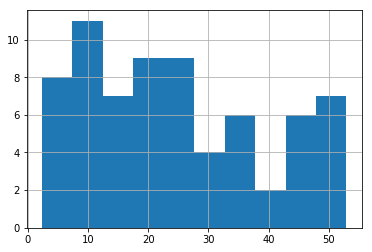

In [73]:
skewed["Newspaper"].hist()

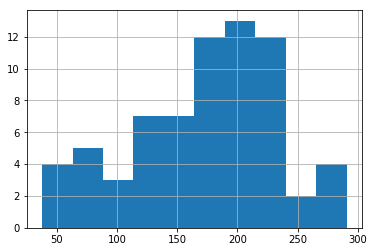

In [74]:
skewed["TV"].hist()

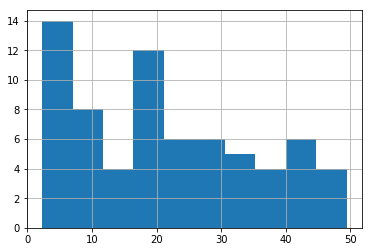

In [75]:
skewed["Radio"].hist()

In [76]:
skewed[skewed["Residual"] < -2]

,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted,Residual
1,2,44.500,39.300,45.100,10.400,12.636,-2.236
21,22,237.400,5.100,23.500,12.500,14.580,-2.080
25,26,262.900,3.500,19.500,12.000,15.376,-3.376
35,36,290.700,4.100,8.500,12.800,16.647,-3.847
81,82,239.800,4.100,36.900,12.300,14.563,-2.263
100,101,222.400,4.300,49.800,11.700,13.903,-2.203
102,103,280.200,10.100,21.400,14.800,17.368,-2.568
131,132,265.200,2.900,43.000,12.700,15.477,-2.777
135,136,48.300,47.000,8.500,11.600,14.061,-2.461
169,170,284.300,10.600,6.400,15.000,17.569,-2.569


**Conclusion: This model will make more accurate predictions when it focuses on companies that spent less than $200 on TV advertising.** 

In [78]:
df = df[df["TV"] <= 200]

In [80]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted,Residual
count,117.000,117.000,117.000,117.000,117.000,117.000,117.000
mean,107.265,97.388,20.265,23.879,11.450,11.298,0.153
std,56.697,59.372,14.062,14.890,3.773,3.634,1.610
min,2.000,0.700,0.000,0.900,1.600,3.930,-9.007
25%,64.000,44.700,8.400,10.200,9.400,8.864,-0.300
50%,113.000,94.200,18.100,22.000,11.000,10.766,0.401
75%,156.000,142.900,30.600,35.100,14.100,14.061,1.234
max,198.000,199.800,49.400,52.900,22.400,20.821,2.686


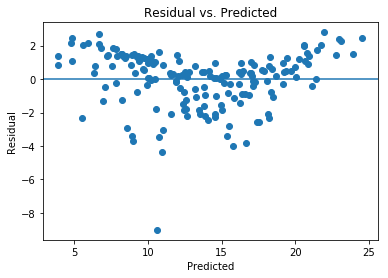

In [79]:
regr = linear_model.LinearRegression()
Y = df["Sales"].values.reshape(-1,1)
X = df[["TV", "Radio", "Newspaper"]]

regr.fit(X, Y)

plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs. Predicted")
plt.show()

In [82]:
data_url = 'https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv'
data = pd.read_csv(data_url, index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.100,37.800,69.200,22.100
2,44.500,39.300,45.100,10.400
3,17.200,45.900,69.300,9.300
4,151.500,41.300,58.500,18.500
5,180.800,10.800,58.400,12.900


In [83]:
linear_formula = "Sales ~ TV+Radio+Newspaper"

lm = smf.ols(formula=linear_formula, data=data).fit()

In [84]:
lm.params

Intercept    2.939
TV           0.046
Radio        0.189
Newspaper   -0.001
dtype: float64

In [85]:
lm.pvalues

Intercept   0.000
TV          0.000
Radio       0.000
Newspaper   0.860
dtype: float64

In [86]:
lm.rsquared

0.8972106381789522

In [87]:
lm.conf_int()

,0,1
Intercept,2.324,3.554
TV,0.043,0.049
Radio,0.172,0.206
Newspaper,-0.013,0.011


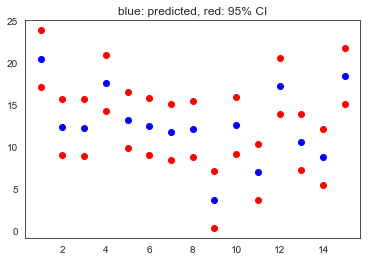

In [88]:
prstd, iv_1, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], "o", color="r")
plt.plot(iv_1[0:15], "o", color="r")
plt.plot(lm.fittedvalues[0:15], "o", color="b")
plt.title("blue: predicted, red: 95% CI")
plt.show()